Perform EDA and Preprocessing on the following data set.

Acknowledgement - kaggle.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load csv file
df=pd.read_csv('gplay.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [3]:
#remove unwanted column permanently
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [5]:
#check for null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

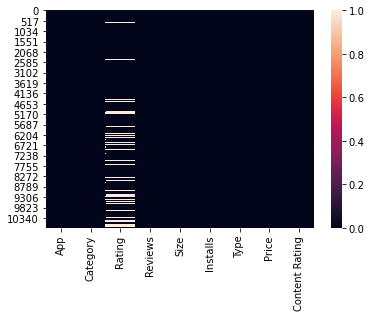

In [6]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
#to check percent of null values
df.shape

(10841, 9)

In [8]:
df.isnull().sum()*100/df.shape[0]

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
dtype: float64

In [9]:
#to fill null values with mean/median
m=df['Rating'].mean()
m=round(m,1)
print('Mean : ',m)
print('Median : ',df['Rating'].median())

Mean :  4.2
Median :  4.3


In [10]:
df['Rating'].fillna(m,inplace=True)

In [11]:
#Type column having null value ,to see what types of values Type has
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [12]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [13]:
#fill null values in Type column with Free because maximum values are Free
df['Type'].fillna('Free',inplace=True)

In [14]:
#replace 0 with Free
df['Type'].replace('0','Free',inplace=True)

In [15]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [16]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [17]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [18]:
#fill null values with maximum value i.e. Everyone
df['Content Rating'].fillna('Everyone',inplace=True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

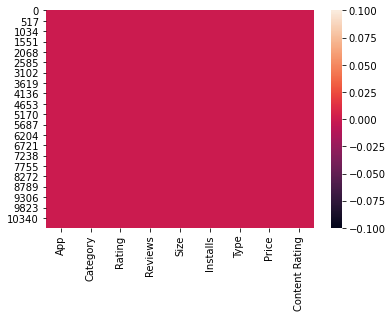

In [20]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [23]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [24]:
#to remove $ from Price column permanently
#lstrip() is inbuilt method to remove specified char from left
df['Price']=df['Price'].map(lambda x : x.lstrip('$'))

In [25]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [26]:
#replace Everyone with 0.
df['Price'].replace('Everyone','0',inplace=True)

In [27]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [28]:
#change datatype of price from object to numerical
df['Price']=df['Price'].astype('float')

In [29]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [30]:
#1Mb=1024kb
#so we convert kb into Mb dividing with 1024
#first remove char from Mb values
df['Size']=df['Size'].map(lambda x : x.rstrip('M'))

In [31]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201k', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '23k', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79k', '8.4', '118k', '44', '695k',
       '1.6', '6.2', '18k', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45',
       '63', '49', '77', '4.4', '4.8', '70', '6.9', '9.3', '1

In [32]:
#convert Kb values into Mb
df['Size']=df['Size'].map(lambda x: str(round(float(x.rstrip('k'))/1024,1))
                          if x[-1]=='k' else x)

In [33]:
df['Size'].replace('1,000+',np.nan,inplace=True)
df['Size'].replace('Varies with device',np.nan,inplace=True)

In [34]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [35]:
#to check null values
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1696
Installs             0
Type                 0
Price                0
Content Rating       0
dtype: int64

In [36]:
#to check % of null values
df.isnull().sum()*100/df.shape[0]

App                0.000000
Category           0.000000
Rating             0.000000
Reviews            0.000000
Size              15.644313
Installs           0.000000
Type               0.000000
Price              0.000000
Content Rating     0.000000
dtype: float64

In [37]:
#change data type of Size column
df['Size']=df['Size'].astype('float')

In [38]:
m=df['Size'].mean()
m=round(m,1)
print('Mean :',m)
print('Median :',df['Size'].median())

Mean : 21.5
Median : 13.0


In [39]:
#fill null values with mean
df['Size'].fillna(m,inplace=True)

In [40]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
dtypes: float64(3), object(6)
memory usage: 762.4+ KB


In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone


In [43]:
#to remove + sign from Installs column and then remove comma
df['Installs']=df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs']=df['Installs'].map(lambda x : ''.join(x.split(',')))

In [44]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [45]:
#replace Free with null values
df['Installs'].replace('Free',np.nan,inplace=True)

In [46]:
#check null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          1
Type              0
Price             0
Content Rating    0
dtype: int64

In [47]:
#change datatype of Installs column from object to float permanently
df['Installs']=df['Installs'].astype('float')

In [48]:
#replace null with mean
m=df['Installs'].mean()
m=round(m,1)
print('Mean : ',m)
df['Installs'].fillna(m,inplace=True)

Mean :  15464338.9


In [49]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [50]:
pd.set_option('display.max_rows',None)

In [51]:
#df['Reviews'].value_counts()

In [52]:
#remove M sign in reviews column
df['Reviews']=df['Reviews'].map(lambda x : x.rstrip('M'))

In [53]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [54]:
df['Reviews']=df['Reviews'].astype('float')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
dtypes: float64(5), object(4)
memory usage: 762.4+ KB


In [56]:
#now there is no null value in dataset

In [57]:
#2. Handling Outliers

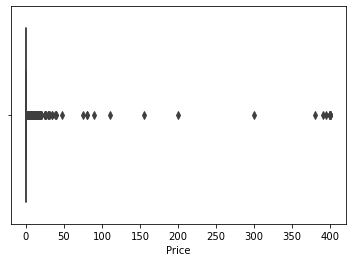

In [58]:
#target variable is Price
sns.boxplot(data=df,x='Price')
plt.show()

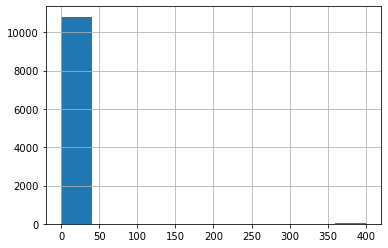

In [59]:
df.Price.hist()
plt.show()

In [60]:
#3.Categorical data

In [61]:
df1=df.select_dtypes(object)
df2=df.select_dtypes(float)

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Type            10841 non-null  object
 3   Content Rating  10841 non-null  object
dtypes: object(4)
memory usage: 338.9+ KB


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    10841 non-null  float64
 1   Reviews   10841 non-null  float64
 2   Size      10841 non-null  float64
 3   Installs  10841 non-null  float64
 4   Price     10841 non-null  float64
dtypes: float64(5)
memory usage: 423.6 KB


In [64]:
#convert data types of object to numerical
#to convert categorical data we use LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in df1:
    obj=LabelEncoder() #create object of class LabelEncoder
    df1[col]=obj.fit_transform(df1[col])

In [65]:
df1.head()

,App,Category,Type,Content Rating
0,6963,1,0,1
1,2632,1,0,1
2,8657,1,0,1
3,7828,1,0,4
4,7023,1,0,1


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   App             10841 non-null  int32
 1   Category        10841 non-null  int32
 2   Type            10841 non-null  int32
 3   Content Rating  10841 non-null  int32
dtypes: int32(4)
memory usage: 169.5 KB


In [67]:
#4.Handling Skewness

In [68]:
#we apply of df2 because skewness is find only on pure numerical columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    10841 non-null  float64
 1   Reviews   10841 non-null  float64
 2   Size      10841 non-null  float64
 3   Installs  10841 non-null  float64
 4   Price     10841 non-null  float64
dtypes: float64(5)
memory usage: 423.6 KB


Skewness
Rating
0.6352283130170882


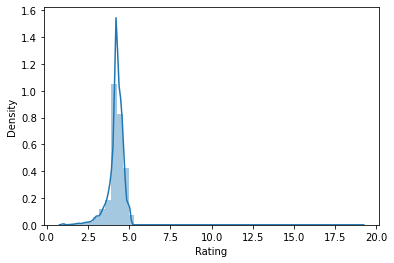

Reviews
16.448055917969842


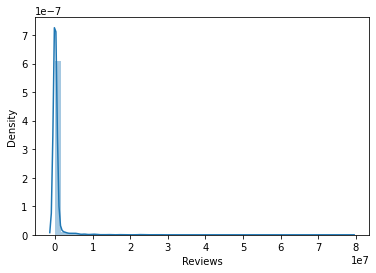

Size
1.6956633191924504


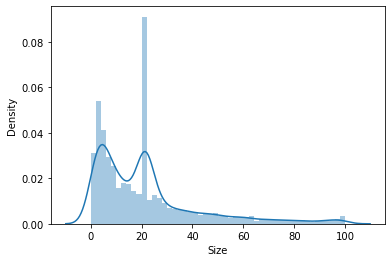

Installs
9.57118360074556


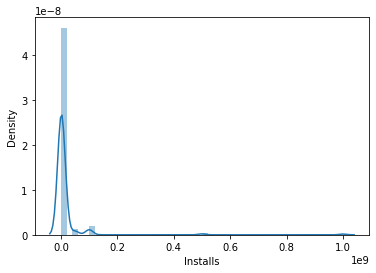

Price
23.705209240237874


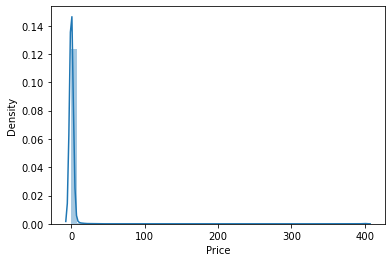

In [69]:
#draw normalized curve using distplot
from scipy.stats import skew
print('Skewness')
for col in df2:
    print(col)
    print(skew(df2[col]))
    sns.distplot(df2[col])
    plt.show()

In [70]:
#transformation is done if we get skewness and no relation
#to find correlation
df2.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.064447,0.070928,0.048693,-0.019471
Reviews,0.064447,1.000000,0.128211,0.643121,-0.009666
Size,0.070928,0.128211,1.000000,0.082162,-0.022993
Installs,0.048693,0.643121,0.082162,1.000000,-0.011689
Price,-0.019471,-0.009666,-0.022993,-0.011689,1.000000


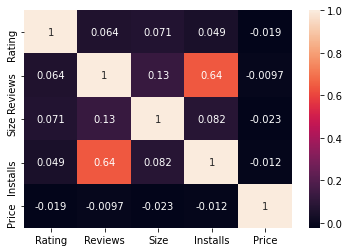

In [71]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [72]:
#to reduce skewness there are 2 methods sqrt and log
#first check whether any value in column is -ve or not
df[df['Rating']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [73]:
df[df['Reviews']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [74]:
df[df['Size']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [75]:
df[df['Installs']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [76]:
df[df['Price']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [77]:
#since there is no negative value in df2 dataset
#and relation between other columns and price is not so good
#so we reduce skewness of columns
for col in df2:
    df2[col]=round(np.sqrt(df2[col]),1)

In [78]:
df2.head()

,Rating,Reviews,Size,Installs,Price
0,2.0,12.6,4.4,100.0,0.0
1,2.0,31.1,3.7,707.1,0.0
2,2.2,295.8,2.9,2236.1,0.0
3,2.1,464.4,5.0,7071.1,0.0
4,2.1,31.1,1.7,316.2,0.0


In [79]:
print('Reduced Skewness')
for col in df2:
    print(col)
    print(skew(df2[col]))
    plt.show()

Reduced Skewness
Rating
-1.7374293365885949
Reviews
5.686949716511206
Size
0.6020700354851514
Installs
4.999539975668884
Price
13.65182633120529


In [80]:
#we concatenate two datasets
df_new=pd.concat([df1,df2],axis=1)
df_new.head()

,App,Category,Type,Content Rating,Rating,Reviews,Size,Installs,Price
0,6963,1,0,1,2.0,12.6,4.4,100.0,0.0
1,2632,1,0,1,2.0,31.1,3.7,707.1,0.0
2,8657,1,0,1,2.2,295.8,2.9,2236.1,0.0
3,7828,1,0,4,2.1,464.4,5.0,7071.1,0.0
4,7023,1,0,1,2.1,31.1,1.7,316.2,0.0


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  int32  
 1   Category        10841 non-null  int32  
 2   Type            10841 non-null  int32  
 3   Content Rating  10841 non-null  int32  
 4   Rating          10841 non-null  float64
 5   Reviews         10841 non-null  float64
 6   Size            10841 non-null  float64
 7   Installs        10841 non-null  float64
 8   Price           10841 non-null  float64
dtypes: float64(5), int32(4)
memory usage: 593.0 KB


In [82]:
#5.Scaling

In [83]:
X=df_new.drop('Price',axis=1)
Y=df_new['Price']

In [84]:
#there are 2 methods MinMaxScaler and StandardScaler
#we use StandardScaler
from sklearn.preprocessing import StandardScaler
for col in X :
    obj=StandardScaler()#create object of class
    X[col]=obj.fit_transform(X[[col]])

In [85]:
X.head()

,App,Category,Type,Content Rating,Rating,Reviews,Size,Installs
0,0.741216,-2.001818,-0.282265,-0.462189,-0.213433,-0.404544,0.128469,-0.432887
1,-0.815746,-2.001818,-0.282265,-0.462189,-0.213433,-0.374380,-0.206196,-0.262898
2,1.350196,-2.001818,-0.282265,-0.462189,1.309326,0.057216,-0.588671,0.165223
3,1.052177,-2.001818,-0.282265,2.519716,0.547946,0.332120,0.415325,1.519028
4,0.762786,-2.001818,-0.282265,-0.462189,0.547946,-0.374380,-1.162384,-0.372351
